##**1. Contextualização**

   Este conjunto de dados foram tirado  do UCI Machine Learning Repository . Os dados dizem respeito ao consumo de combustível do ciclo da cidade em milhas  por galão.
   
   Os dados são repartidos em 9 atributos  cujo 5 são contínuos, 3 discretos e um string:


1. mpg : Milhas por galão "que mede quantos quilômetros o veículo roda por cada litro de gasolina que consome"
2. cil :  Cilindro do veículo
3. desl : deslocamento
4. Cp : Cavalos de potência
5. peso :  Peso do véiculo
6. acc: Aceleração
7. ano_mod: Ano modelo
8. org: Origem do veículo
9. nome : Nome do carro




### 1.1 Carregamento das bibliotecas

In [ ]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


###1.2 Nome das colunas

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
## https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
names = ['mpg', 'cil', 'des', 'cp', 'peso', 'acc', 'ano_mod', 'org', 'nome']
dt_auto = pd.read_table(url, header = None, delim_whitespace = True, names = names)
pd.DataFrame.head(dt_auto)

,mpg,cil,des,cp,peso,acc,ano_mod,org,nome
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 1.3 Análise descritiva dos atributos



In [ ]:
dt_auto.describe()

,mpg,cil,des,peso,acc,ano_mod,org
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


###1.4 Seleção dos atributos númericos

In [ ]:
#Tirando coluna nome
del dt_auto['nome']
dt_auto.head()

,mpg,cil,des,cp,peso,acc,ano_mod,org
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## **2. Testes de amostragem**

A partir deste dados realizou-se vários testes de amostragem e depois foi escolhido o que é mais representativo da população.

###2.1 Amostragem aleatória simples

In [ ]:
def amostragem_aleatoria_simples(dt_auto, amostras ):
   return dt_auto.sample(n= amostras)

In [ ]:
dt_aes = amostragem_aleatoria_simples(dt_auto, 200)
dt_aes.shape

(200, 8)

###2.2 Amostragem sistemática

In [ ]:
def amostragem_sistematica (dt_auto, amostras):
  intervalo = len(dt_auto) // amostras
  rd.seed(1)
  inicio = rd.randint(0, intervalo)
  indices = np.arange(inicio, len(dt_auto), step=intervalo)
  amostragem_sistematica= dt_auto.iloc[indices]
  return amostragem_sistematica

In [ ]:
dt_as = amostragem_sistematica(dt_auto, 199)
dt_as.shape

(199, 8)

###2.3 Amostragem por grupos

In [ ]:
def amostragem_agrupamento(dt_auto, numero_grupos):
  intervalo = len(dt_auto)/ numero_grupos

  grupos = []
  id_grupo = 0
  contagem = 0
  for _ in dt_auto.iterrows():
    grupos.append(id_grupo)
    contagem  += 1
    if contagem > intervalo:
      contagem = 0
      id_grupo += 1
  dt_auto['grupos']= grupos
  rd.seed(1)
  grupos_selecionados = rd.randint(0,numero_grupos)
  return dt_auto[dt_auto['grupos']== grupos_selecionados]

In [ ]:
dt_aag = amostragem_agrupamento(dt_auto, 2)
dt_aag.shape, dt_aag['grupos'].value_counts()

((200, 9), 0    200
 Name: grupos, dtype: int64)

###2.4 Amostragem Estratificada

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
dt_auto['org'].value_counts()

1    249
3     79
2     70
Name: org, dtype: int64

In [ ]:
249/len(dt_auto), 79/len(dt_auto), 70/len(dt_auto)

(0.6256281407035176, 0.1984924623115578, 0.17587939698492464)

In [ ]:
0.6256281407035176 + 0.1984924623115578 + 0.1758793969849246

1.0

In [ ]:
def amostragem_estratificada(dt_auto, percentual):
    split = StratifiedShuffleSplit(test_size=percentual, random_state=1)
    for _, y in split.split (dt_auto, dt_auto['org']):
      dt_y = dt_auto.iloc[y]

    return dt_y

In [ ]:
200/len(dt_auto)

0.5025125628140703

In [ ]:
dt_ae = amostragem_estratificada(dt_auto, 0.5025125628140703)
dt_ae.shape

(200, 9)

###2.5 Amostragem  de reservatório

In [ ]:
def amostragem_reservatorio(dt_auto, amostras ):
  stream = []
  for i in range(len(dt_auto)):
    stream.append(i)
  i = 0
  tamanho = len(dt_auto)

  reservatorio = [0] * amostras
  for i in range(amostras):
    reservatorio[i] = stream[i]

  while  i < tamanho:
     j = rd.randrange(i+1)
     if j < amostras :
       reservatorio[i] = stream[i]
     i += 1
     return dt_auto.iloc[reservatorio]

In [ ]:
dt_ar = amostragem_reservatorio(dt_auto, 200)
dt_ar.shape

(200, 9)

##**3. Seleção da amostra " Estudo comparativo "**

In [ ]:
#média populacional
dt_auto['mpg'].mean ()

23.514572864321607

In [ ]:
#amostra aleatoria simples
dt_aes['mpg'].mean()

23.432

In [ ]:
#amostra sitemática
dt_as['mpg'].mean()

23.39497487437186

In [ ]:
#amostra agrupamento
dt_aag['mpg'].mean()

19.7875

In [ ]:
#amostra estratificada
dt_ae['mpg'].mean()

23.142

In [ ]:
#amostra reservatório
dt_ar['mpg'].mean()

19.7875

---
###***Amostra sistemática selecionada pois ela apresenta a menor margem de erro  e  a  sua média se aparenta mais com a da população.***  

---

## **4. Análise gráfica descritiva**

In [ ]:
dt_as.head()

,mpg,cil,des,cp,peso,acc,ano_mod,org
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1


In [ ]:
dt_as.describe()

,mpg,cil,des,peso,acc,ano_mod,org
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,23.394975,5.477387,195.685930,2999.195980,15.715578,75.994975,1.527638
std,7.904217,1.734452,104.350822,847.110696,2.825034,3.707074,0.783665
min,9.000000,3.000000,70.000000,1613.000000,9.000000,70.000000,1.000000
25%,17.000000,4.000000,106.000000,2272.000000,14.000000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2855.000000,15.500000,76.000000,1.000000
75%,28.000000,8.000000,302.000000,3626.000000,17.450000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.600000,82.000000,3.000000


###4.1 Gráficos de histograma

Text(0, 0.5, 'nº veículos')

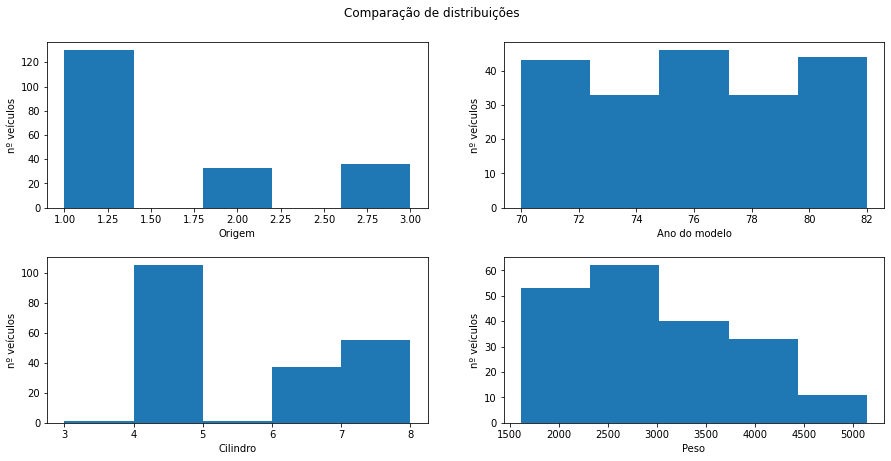

In [ ]:
from numpy.ma.core import size
from IPython.core.pylabtools import figsize
# Cria a figura e os subplots
fig = plt.figure()
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
fig.set_size_inches(15, 7)
fig.suptitle('Comparação de distribuições', x= 0.4, y=.95, horizontalalignment = 'left', verticalalignment = 'top')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


#Cria os gráficos de histograma e acerta os nomes dos eixos
ax1.hist(dt_as['org'], bins = 5)
ax1.set_xlabel('Origem')
ax1.set_ylabel('nº veículos')

ax2.hist(dt_as['ano_mod'], bins = 5)
ax2.set_xlabel('Ano do modelo')
ax2.set_ylabel('nº veículos')

ax3.hist(dt_as['cil'], bins = 5)
ax3.set_xlabel('Cilindro')
ax3.set_ylabel('nº veículos')

ax4.hist(dt_as['peso'], bins = 5)
ax4.set_xlabel('Peso')
ax4.set_ylabel('nº veículos')


### 4.2 Gráficos  Box-plot


Text(0, 0.5, 'Valores')

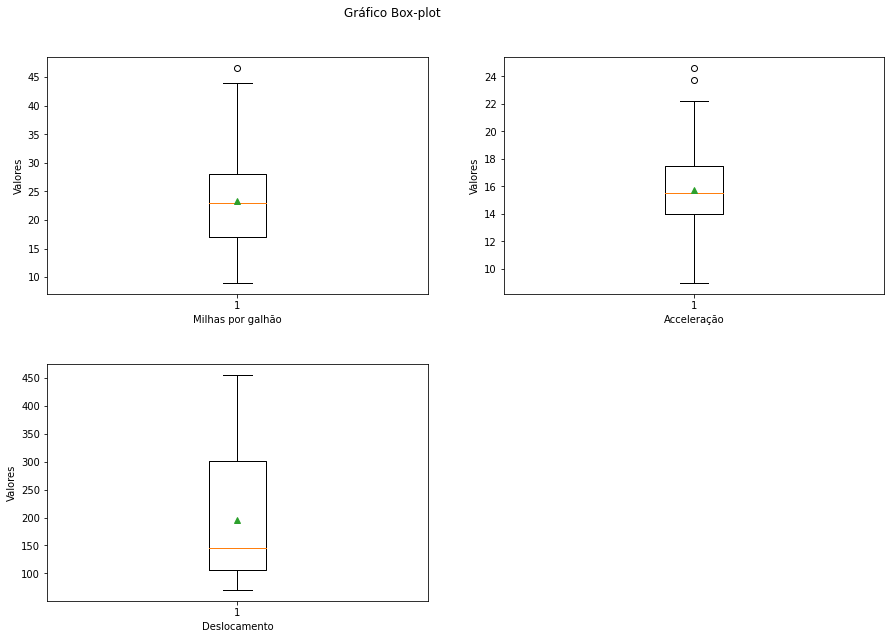

In [ ]:
from numpy.ma.core import size
from IPython.core.pylabtools import figsize
# Cria a figura e os subplots
fig = plt.figure()
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
fig.set_size_inches(15, 10)
fig.suptitle('Gráfico Box-plot', x= 0.4, y=.95, horizontalalignment = 'left', verticalalignment = 'top')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

#Cria os gráficos de Box-plot e acerta os nomes dos eixos
ax1.boxplot(dt_as ['mpg'], showmeans = True)
ax1.set_xlabel('Milhas por galhão')
ax1.set_ylabel('Valores')

ax2.boxplot(dt_as ['acc'], showmeans = True)
ax2.set_xlabel('Acceleração')
ax2.set_ylabel('Valores')

ax3.boxplot(dt_as ['des'], showmeans = True)
ax3.set_xlabel('Deslocamento')
ax3.set_ylabel('Valores')




## **5. Analíse de correlação das variáveis**

In [ ]:
# Remover anos e origem para analise de correlação
dt_as = dt_as.drop(['ano_mod', 'org'], axis = 1)
dt_as.head()

,mpg,cil,des,cp,peso,acc
0,18.0,8,307.0,130.0,3504.0,12.0
2,18.0,8,318.0,150.0,3436.0,11.0
4,17.0,8,302.0,140.0,3449.0,10.5
6,14.0,8,454.0,220.0,4354.0,9.0
8,14.0,8,455.0,225.0,4425.0,10.0


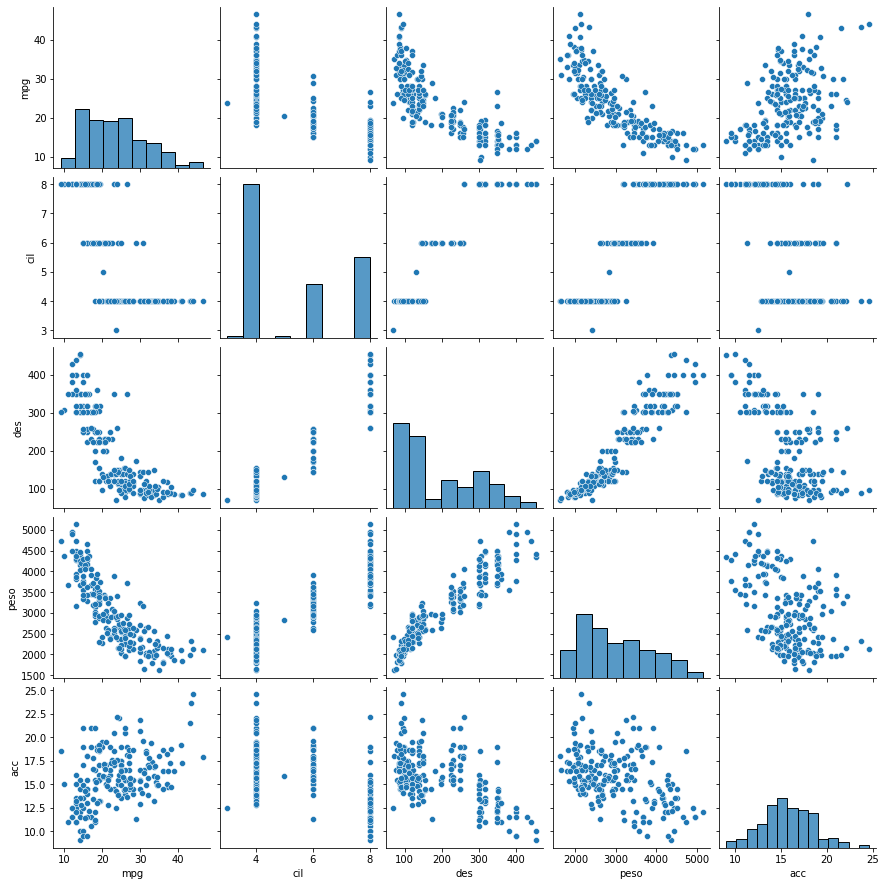

In [ ]:
sns.pairplot(dt_as)

In [ ]:
corrMatPd = dt_as.corr()
corrMatPd

,mpg,cil,des,peso,acc
mpg,1.000000,-0.765643,-0.800782,-0.829978,0.439064
cil,-0.765643,1.000000,0.952311,0.900536,-0.492879
des,-0.800782,0.952311,1.000000,0.940758,-0.538472
peso,-0.829978,0.900536,0.940758,1.000000,-0.430539
acc,0.439064,-0.492879,-0.538472,-0.430539,1.000000
